<a href="https://colab.research.google.com/github/Akalbir17/Disaster_Detection/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disaster Classification Using ResNet-50 Model 

### Importing all the necessary dependencies

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras import Model
from collections import deque
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from  PIL import ImageFile
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [ ]:
%tensorflow_version 2.x

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
baseModel = ResNet50V2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(256, 256, 3)))

for layer in baseModel.layers:
  layer.trainable = False

baseModel.summary()

94683136/94668760 [==============================] - 1s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 130, 130, 64) 0           conv1_conv[0][0]                 
________________________

Placing the Head model over the ResNet50 to extract required features

In [ ]:
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(12, activation="softmax")(headModel)

model = Model( baseModel.input, headModel) 

model.compile(optimizer = Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

Peforming Data Augmentation to avoid overfitting 

In [ ]:
train_dir = '/content/drive/MyDrive/SCAAI_Drive_Akalbir Singh Chadha_PS3/training'
val_dir = '/content/drive/MyDrive/SCAAI_Drive_Akalbir Singh Chadha_PS3/validation'


train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 50,
                                                    class_mode = 'categorical', 
                                                    target_size = (256, 256))     


validation_generator =  test_datagen.flow_from_directory( val_dir,
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical', 
                                                          target_size = (256, 256))

Found 9484 images belonging to 12 classes.
Found 4061 images belonging to 12 classes.


In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 10,
            epochs = 48,
            validation_steps = 25,
            verbose = 1)

Epoch 1/48
10/10 [==============================] - 305s 31s/step - loss: 31.2631 - accuracy: 0.5020 - val_loss: 11.8634 - val_accuracy: 0.7588
Epoch 2/48
10/10 [==============================] - 266s 27s/step - loss: 14.3101 - accuracy: 0.7020 - val_loss: 8.0772 - val_accuracy: 0.7775
Epoch 3/48
10/10 [==============================] - 255s 26s/step - loss: 10.3989 - accuracy: 0.7180 - val_loss: 4.9842 - val_accuracy: 0.8000
Epoch 4/48
10/10 [==============================] - 249s 26s/step - loss: 5.9557 - accuracy: 0.7420 - val_loss: 3.6917 - val_accuracy: 0.8263
Epoch 5/48
10/10 [==============================] - 241s 25s/step - loss: 2.7925 - accuracy: 0.7700 - val_loss: 2.0875 - val_accuracy: 0.8238
Epoch 6/48
10/10 [==============================] - 232s 24s/step - loss: 2.1160 - accuracy: 0.7820 - val_loss: 2.1447 - val_accuracy: 0.8012
Epoch 7/48
10/10 [==============================] - 228s 23s/step - loss: 1.4787 - accuracy: 0.8037 - val_loss: 1.0202 - val_accuracy: 0.8475
Ep

# Saving the model to avoid overhead and repeated runing

In [ ]:
model.save('/content/drive/MyDrive/SCAAI_Drive_Akalbir Singh Chadha_PS3/ResNet50')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SCAAI_Drive_Akalbir Singh Chadha_PS3/ResNet50/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
res_model = tf.keras.models.load_model('/content/drive/MyDrive/SCAAI_Drive_Akalbir Singh Chadha_PS3/ResNet50')
res_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 130, 130, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

# Visualizing the Output

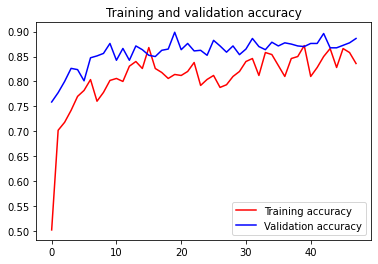

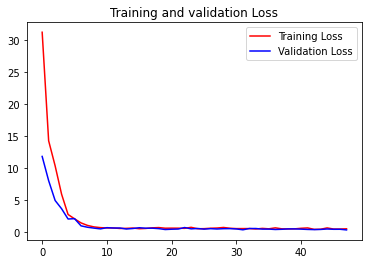

<Figure size 432x288 with 0 Axes>

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Testing Section
Upload an image of your choice to classify the disaster

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = res_model.predict(images, batch_size=12)
  print('Probability of Damaged Infrastructure, Drought, Earthquake, Human Damage, Land Slide, Non Damage Buildings,  Non Damage Wild forest, Non Damage Human, Non Damage Sea, Urban Fire, Water Disaster, Wild Fire ')
  print(classes[0])